# Convolutional Neural Networks

## What does convolution mean?

**Convolution** is a mathematical operation on two functions ($f$ and $g$) that produces a third function ($f ∗ g$) that expresses   
`how the shape of one is modified by the other`.

![1d-conv](https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif)

$${\displaystyle (f*g)(t):=\int _{-\infty }^{\infty }f(\tau )g(t-\tau )\,d\tau .}$$

$${\displaystyle (f*g)[n]=\sum _{m=-\infty }^{\infty }f[m]g[n-m],}$$

## Discrete 2D Convolution

The 2D convolution operation: 
* starts with a **kernel**, which is simply a small matrix of weights. 
* This kernel “**slides**” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and 
* then **summing up the results** into a single output pixel.

![2d-conv](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [33]:
import torch
import torchvision
from PIL import Image
import torchvision.transforms as tv
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 20 ,15

### Load an image

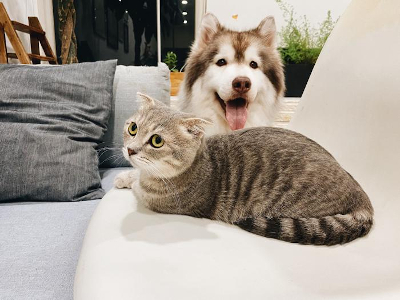

In [34]:
img_src = Image.open('images/dogncat.jpg')
display(img_src)

### Define a Conv2D layer

In [35]:
# convert the input image to torch tensor
img = tv.ToTensor()(img_src) # size = [3, 300, 400]

# unsqueeze the image to make it 4D tensor
img = img.unsqueeze(0) # image size = [1, 3, 300, 400]

# define convolution layer
# conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
conv = torch.nn.Conv2d(3, 1, 3, 1, 1)

print("conv's new weight ", conv.weight, "\n", conv.weight.shape) # [out_channels, in_channels, kernel_size]

conv's new weight  Parameter containing:
tensor([[[[ 0.0974,  0.0410, -0.0665],
          [-0.1891, -0.0308, -0.1141],
          [-0.1211, -0.1360,  0.1166]],

         [[-0.1186,  0.1845, -0.1269],
          [-0.0576, -0.0556,  0.0705],
          [-0.1292, -0.0499, -0.0792]],

         [[ 0.0353,  0.1793,  0.1368],
          [ 0.0767, -0.1064,  0.0884],
          [-0.0294, -0.0872,  0.1295]]]], requires_grad=True) 
 torch.Size([1, 3, 3, 3])


In [36]:
def plot_two_images(imsrc, imconv):
    #print("output image:", imconv.shape)
    # squeeze image to make it 3D
    imconv = imconv.squeeze(0) #now size is again [3, 300, 400]
    #print("output image:", imconv.shape)
    c, h, w = imconv.shape
    fig, ax = plt.subplots(1, c+1)
    ax[0].imshow(imsrc);
    for i in range(c):
        img_pil = tv.ToPILImage()(imconv[i])
        ax[1+i].imshow(img_pil, cmap='gray');

### Apply a Conv2D layer

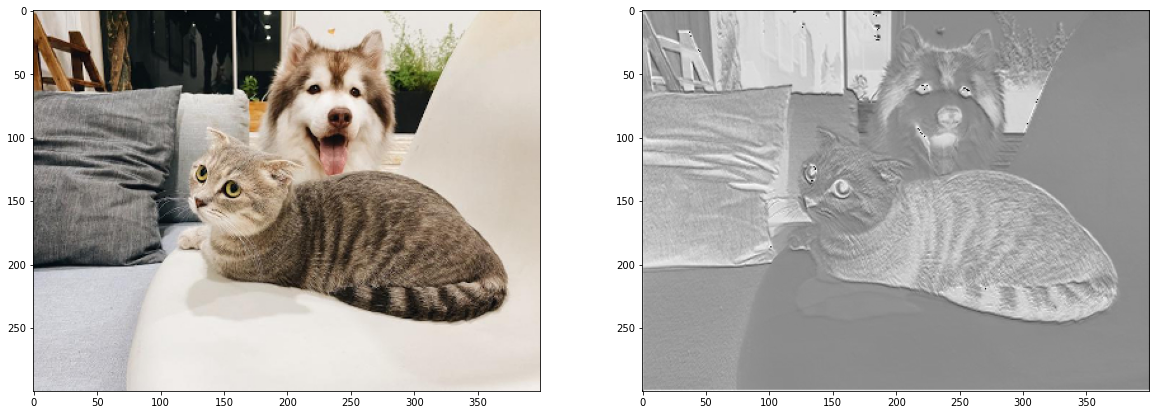

In [37]:
img_conv = conv(img)
plot_two_images(img_src, img_conv)
#print(img_conv.shape)

### We can manually change the kernel

In [38]:
X = torch.Tensor([[[[1 , 0, -1],
                   [ 2,  0 ,-2], 
                   [ 1,  0 ,-1]],
                  [[ 0, -1,  0],
                   [-1,  5 ,-1], 
                   [ 1, -1 , 0]],
                  [[ 1 , 2,  1],
                   [ 0,  0 , 0], 
                   [-1, -2 ,-1]]]])
X = torch.nn.Parameter(X) # calling this turns tensor into "weight" parameter
conv.weight = X # simply copying over the new weight 

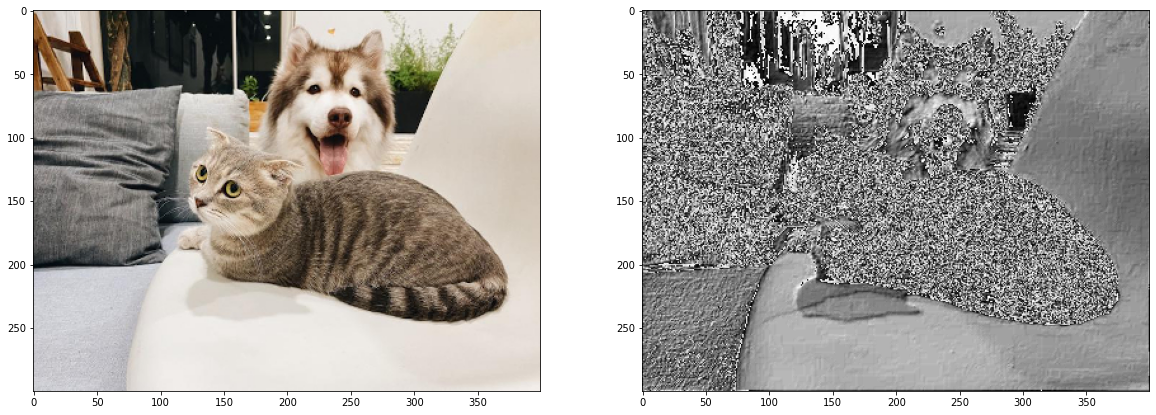

In [39]:
img_conv = conv(img)
plot_two_images(img_src, img_conv)

In [40]:
conv.weight

Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]],

         [[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 1., -1.,  0.]],

         [[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]]], requires_grad=True)

### More than one output channel

conv's weights torch.Size([5, 3, 7, 7])


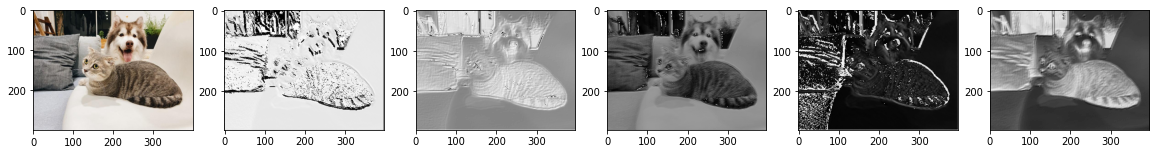

In [41]:
# conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
conv = torch.nn.Conv2d(3, 5, 7, 1, 1)
img_conv = conv(img)
plot_two_images(img_src, img_conv)
print("conv's weights", conv.weight.shape)

## Introduce convolutional neural networks

* AlexNet was one of **the first** Deep convolutional networks to achieve considerable accuracy on the 2012 **ImageNet** LSVRC-2012 challenge with an accuracy of **84.7%** as compared to the second-best with an accuracy of <font color="red">73.8%</font>. 
* The idea of spatial correlation in an image frame was explored using **convolutional layers** and receptive fields.

![AlexNet](https://miro.medium.com/max/720/1*bD_DMBtKwveuzIkQTwjKQQ.png)

### The AlexNet model

In [10]:
class AlexNet(torch.nn.Module):
  def __init__(self, num_classes=1000):
      super(AlexNet, self).__init__()
      self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
      self.relu = nn.ReLU(inplace=True)
      self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
      self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
      self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
      self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
      self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
      self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
      self.fc1 = nn.Linear(256 * 6 * 6, 4096)
      self.fc2 = nn.Linear(4096, 4096)
      self.fc3 = nn.Linear(4096, num_classes)

  def forward(self, x):
      x = self.relu(self.conv1(x))
      x = self.maxpool(x)
      x = self.relu(self.conv2(x))
      x = self.maxpool(x)
      x = self.relu(self.conv3(x))
      x = self.relu(self.conv4(x))
      x = self.relu(self.conv5(x))
      x = self.maxpool(x)
      x = self.avgpool(x)
      x = x.view(x.size(0), 256 * 6 * 6)
      x = self.relu(self.fc1(x))
      x = self.relu(self.fc2(x))
      return self.fc3(x)

### Max pooling

* Max pooling is a **sample-based discretization process**. 
* The objective is to **down-sample** an input representation,    
  **reducing its dimensionality** with a **features selection** approach.
* to avoid **over-fitting** by providing an abstracted form of the representation. 
* it reduces the **computational cost** by reducing the number of parameters to learn. 

![max-pooling](https://goodboychan.github.io/images/copied_from_nb/image/maxpool.png)

### Max-pooling operator in Pytorch

In [11]:
import torch
import torch.nn as nn
im = torch.rand(1, 1, 6, 6)
im

tensor([[[[0.5338, 0.5651, 0.3288, 0.0140, 0.7389, 0.6658],
          [0.3089, 0.7083, 0.1487, 0.3954, 0.7030, 0.5304],
          [0.3588, 0.6864, 0.7286, 0.5707, 0.6032, 0.6951],
          [0.3091, 0.9195, 0.6139, 0.8865, 0.6947, 0.3170],
          [0.9273, 0.9344, 0.5693, 0.7577, 0.1573, 0.7448],
          [0.2540, 0.3447, 0.0264, 0.1809, 0.6327, 0.9980]]]])

In [12]:
max_pooling = nn.MaxPool2d(2)
# Apply the pooling operator
output_feature = max_pooling(im)
# Print the results of both cases
print(output_feature)

tensor([[[[0.7083, 0.3954, 0.7389],
          [0.9195, 0.8865, 0.6951],
          [0.9344, 0.7577, 0.9980]]]])


### Adaptive Average Pool 2D

* Transforms an **Input** tensor: $(N, C, H_{in}, W_{in})$ to an **Output** tensor: $(N, C, H_{out}, W_{out})$.

In the following example

* Adaptive pooling pools from elements $avg([[0, 1],[5, 6]]) = 3$,  $avg([[1, 2, 3],[6, 7, 8]])=4.5$, and so on...
* adaptive pooling tries to reduce overlapping in pooling.

In [13]:
in_length = 5
out_length = 3
x = torch.arange(0, in_length*in_length).view(1, 1, in_length,in_length).float()
print(x)
aa_pooling = nn.AdaptiveAvgPool2d(out_length)
output_feature = aa_pooling(x)
print(output_feature)

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])
tensor([[[[ 3.0000,  4.5000,  6.0000],
          [10.5000, 12.0000, 13.5000],
          [18.0000, 19.5000, 21.0000]]]])


In [14]:
m = nn.AdaptiveAvgPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
print(output.shape)

torch.Size([1, 64, 5, 7])


In [15]:
m = nn.AdaptiveAvgPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.shape)

torch.Size([1, 64, 7, 7])


### ReLu = Rectified Linear Activation Function

* Acts like a **nonlinear function** allowing complex relationships in the data to be learned.
* the replacement of **sigmoidal** activation functions with functions such as **ReLu** has significantly improved the performance of feedforward networks.
* [For more details](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

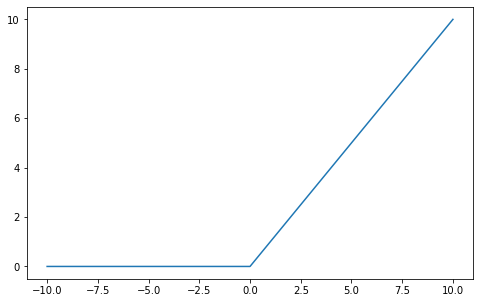

In [16]:
rcParams['figure.figsize'] = 8 ,5
def relu(x):
    return max(0.0, x)
series_in = [x for x in range(-10, 11)]
series_out = [relu(x) for x in series_in]
plt.plot(series_in, series_out)
plt.show()

## Build a simple CNN for the MNIST dataset

* We are ready to build your first convolutional neural network. 
* We use the MNIST dataset, which is made of handwritten digits from 0 to 9. 
* The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. 
* Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes.
* MNIST images have shape (1, 28, 28)

![MNIST](https://miro.medium.com/max/640/0*Yf6jSy8y3QHHhAws)

### Create del CNN

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(49 * 10, 10)
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 7 * 7 * 10)
        return self.fc(x)

### Download MNIST Dataset

In [18]:
import torchvision.transforms as transforms

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

# Preparing the training and test set
trainset = torchvision.datasets.MNIST('mnist', train=True, transform=transform, download=True)
testset = torchvision.datasets.MNIST('mnist', train=False, transform=transform, download=True)

# Prepare loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)


### Train the model

In [19]:
import torch.optim as optim

net = Net()
optimizer = optim.Adam(net.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

In [20]:
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    # Compute the forward pass
    outputs = net(inputs)
    
    # Compute the loss function
    loss = criterion(outputs, labels)
    if i%5000 == 0: print(f"{i}: loss = {loss}")
    # Compute the gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()

0: loss = 2.0337111949920654
5000: loss = 0.009633599780499935
10000: loss = 0.007515371777117252
15000: loss = 0.14782293140888214
20000: loss = 0.08842410147190094
25000: loss = 8.4938325881958
30000: loss = 0.00012706902634818107
35000: loss = 0.0015200738562271
40000: loss = 0.017787812277674675
45000: loss = 0.001946580014191568
50000: loss = 0.001867456827312708
55000: loss = 9.417489309271332e-06


###  Make predictions

In [21]:
net.eval()
# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):
    # Get the image and label from data
    image, label = data
    
    # Make a forward pass in the net with your image
    output = net(image)
    
    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    
    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))
        
    if i > 10:
        break

Yipes, your net made the right prediction tensor([7])
Yipes, your net made the right prediction tensor([2])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([5])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([6])


# Problems and state-of-the-art models

* On [this page](https://paperswithcode.com/methods/category/convolutional-neural-networks) you will find  a continuously updated list of **convolutional neural networks**.
* On [this other page](https://paperswithcode.com/area/computer-vision) you will find a list of very active **Computer Vision activities** where deep learning gets the best results.


![](images/paperwithcode.png)


## Image Classification

https://paperswithcode.com/task/image-classification
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000951-52325f45_O0tAMly.jpg)

## Image Classification using CNN on ImageNet

* The goal is to classify the image (to comprehend an entire image as a whole) by assigning it to a specific label.
* On this task in the last 2 years the models that get the best results are based on **Transformers**
* But there are **many new CNN models** that achieve results close to those obtained by Transformer
* Below the benchmark on **ImageNet** considering only the **convolutional models**

![](images/CNN-SOTA-ImageNet.png)


### NFNet-F4+: Normalizer-Free Networks

* NFNet proposes a **adaptive gradient clipping** technique which overcomes instabilities for **ResNets without normalization**.
* ResNets without normalization are often **unstable** for large learning rates or strong data augmentations.
* **Gradient Clipping** clips the size of the gradients to ensure optimization performs more reasonably **near sharp areas of the loss surface**. 
* It can be performed in a number of ways
  * One option is to **simply clip** the parameter **gradient element-wise** before a parameter update. 
![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-28_at_12.41.14_PM_LLryIVA.png)

### ConvNeXt-XL 

* **ConvNeXt**, a pure ConvNet model that “modernize” a standard ResNet toward the design of a Vision Transformer
* several new key components are added, e.g.: 
  * **Training Techniques**, Macro Design, ResNeXt-ify, **Inverted Bottleneck**, **Large Kernel**, and Micro Design.

![](https://user-images.githubusercontent.com/8370623/180626875-fe958128-6102-4f01-9ca4-e3a30c3148f9.png)

## Semantic Segmentation

https://paperswithcode.com/task/semantic-segmentation
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000885-bec5f079_K84qLCL.jpg)

## Semantic Segmentation using CNN on PASCAL VOC 2012

* is the task of clustering parts of an image together which belong to the same object class. 
* It is a form of **pixel-level prediction** because each pixel in an image is classified according to a category


![benchmark-pascal-voc](images/CNN-SOTA-Pacal-VOC-segmentation.png)

### SegNeXt-L

* **Convolutional Attention** is a more efficient and effective way to **encode contextual information** than the self-attention mechanism in transformers. 
* a novel convolutional attention network that uses **cheap convolutional operations**
![](https://lh4.googleusercontent.com/m_J5LJnxa0eG3aZn9r9bozoa85GMk66mFqHermyjag4rSJ66YfIb5gyZxxEWi7D1BU8lTnVUIyh6sT0YUDB0OaZE4p6krE2D61CdeW_6bKaAt1lyoDNCPTtpinAohUaf3fZco2g0oC438gTaQ7QPIjY3BXpVEuXo6AcEtKnutpCF0j7I2IuRosyAQg)

### DeepLabv3+ 

*  a semantic segmentation architecture that improves upon DeepLabv3 with several improvements, such as **adding a simple yet effective decoder** module to refine the segmentation results.

![](https://production-media.paperswithcode.com/models/Screen_Shot_2021-02-21_at_10.34.37_AM_qcoqzIU.png)

## Object Detection 

![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000004-7757802e.jpg)

## Super-Resolution 

https://paperswithcode.com/task/super-resolution
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000032-0f0cf3b2.jpg)

## Image Generation 

https://paperswithcode.com/task/image-generation
![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2020/02/gansapp3.png)

## Pose Estimation 

https://paperswithcode.com/task/pose-estimation
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000772-08b899a7_dxcCsdc.jpg)

## Activity Recognition

https://paperswithcode.com/task/activity-recognition
![](https://miro.medium.com/max/720/1*EvxO1sdZ1DCLfDxQNTiflQ.png)

## Facial Recognition

https://paperswithcode.com/task/face-recognition
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000458-a47f7d65.jpg)

## Depth Estimation

https://paperswithcode.com/task/depth-estimation
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000605-d9849a91.jpg)

## Optical Character Recognition

https://paperswithcode.com/task/optical-character-recognition
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000012-96a4bb03_wHfYaCD.jpg)

## Object Tracking 

https://paperswithcode.com/task/object-tracking
![](https://production-media.paperswithcode.com/thumbnails/task/task-0000000553-467cdf5d_SvoYQZ2.jpg)